In [2]:
%matplotlib inline
%autoreload 2

In [3]:
import nudraw
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('svg')

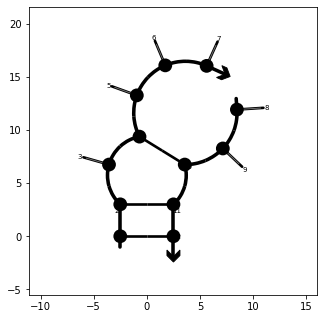

In [4]:
from nudraw.static import MatplotlibBackend

def test(seq, dp):
    fig = plt.figure(figsize=(4, 4))
    canvas = MatplotlibBackend()
    box = nudraw.draw(canvas, (4, 4), dp, seq, numbers=[], ticks=1, circles=1, material='RNA')
    ax = fig.add_axes([0,0,1,1])
    canvas.render(ax, box)

test('CCCCAAA+AGGGG', '((.(...+..)))')
plt.show()
test('CCCCAAA+AGGGG', '.......+.....')
plt.show()
test('CGAUAUGUCAGUC+ACUGAUCGCGUACU+ACUGAUCGUACGUA+GCUAGCU', '.......(((((.+)))))..((((((.+.......))))...+....)).')

In [5]:
from bokeh.io import output_notebook, show
from nudraw.dynamic import plot, Sequence, probability_bar, legend_segment
import numpy as np
output_notebook()

Loading BokehJS ...

In [ ]:
'+'

In [117]:
from bokeh.palettes import magma, viridis, gray, all_palettes
from bokeh.models import Legend
import colorcet

palette = np.array(gray(256))[::-1][10:]
palette4 = dict(zip('ACGTU', ['#e41a1c','#377eb8','#4daf4a','#984ea3', '#984ea3']))    

def test(sequences, dp):
    sequence = Sequence(sequences, kind='letters')
    prob = np.random.random(sequence.length)
    
    if 1:
        colors = palette[(prob * (len(palette) - 1)).astype(int)]
    else:
        colors = np.array([palette4[b] for b in sequence.base])
        
    sequence.tick[:] = sequence.circle[:] = colors
    sequence.backbone[:] = np.array(all_palettes['Category10'][10])[sequence.strand_index]
#     sequence.label_numbers(2, lines=False)
    sequence.strand_name[:] = np.array(list('abcdef'))[sequence.strand_index]
    sequence.label_strands('abcdef'[:len(sequences)])
    
    p = plot(sequence, dp, size=400, material='RNA', title='%d strands, %d nt' % (len(sequences), sequence.length),
             data_fields={'pp': prob}, display_fields=[('Strand', '@strand_name'), ('Index', '@i'), ('Base', '@base'), ('Probability', '@pp')])
        
    if 1:
        p.add_layout(probability_bar(palette), 'right')
    else:
        p.add_layout(Legend(items=[legend_segment(p, k, v, 5) for k, v in palette4.items() if k in sequence.base]))
    
    show(p)
    
test(('CCCCAUA', 'AGGGG'), '((.(...+..)))')

In [118]:
test('CGAUAUGUCAGUC+ACUGAUCGCGUACU+ACUGAUCGUACGUA+GCUAGCU'.split('+'), '.......(((((.+)))))..((((((.+.......))))...+....)).')